In [9]:
from genetic_algorithm import GA
from constants import *
import matplotlib.pyplot as plt

In [65]:
def run_tests(name, n_tests, pop_size=100, mutate_threshold=0.3, generations=500, selection_scheme=ROULETTE,
              crossover_type=MULTI_POINT, n_elites=50, thrust_value=870, low_level_mutation=False):
    thrust_lst = []
    fitness_lst = []
    print("\ntesting...", end='')
    for i in range(n_tests):
        ga = GA(pop_size=pop_size,
                mutate_threshold=mutate_threshold,
                generations=generations,
                selection_scheme=selection_scheme,
                crossover_type=crossover_type,
                n_elites=n_elites,
                thrust_value=thrust_value,
                low_level_mutation=low_level_mutation,
                )
        ga.run()
        best_thrust = ga.population[0].thrust
        best_fitness = ga.population[0].fitness_val
        thrust_lst.append(best_thrust)
        fitness_lst.append(best_fitness)
        print('.', end='')
    return {'thrust': thrust_lst, 'fitness': fitness_lst, 'name': name}


In [38]:
n_tests = 10
elit_arit = run_tests('elitism, ar', n_tests, selection_scheme=ELITISM, crossover_type=ARITHMETIC, )
elit_sp = run_tests('elitism, sp', n_tests, selection_scheme=ELITISM, crossover_type=SINGLE_POINT, )
elit_mp = run_tests('elitism, mp', n_tests, selection_scheme=ELITISM, crossover_type=MULTI_POINT, )
elitism_tests = [elit_arit, elit_sp, elit_mp]
print("finished testing")



testing.............
testing.............
testing.............finished testing


In [66]:
rou_arit = run_tests('roulette, ar', n_tests, selection_scheme=ROULETTE, crossover_type=ARITHMETIC,                     )
rou_sp = run_tests('roulette, sp', n_tests, selection_scheme=ROULETTE, crossover_type=SINGLE_POINT,)
rou_mp = run_tests('roulette, mp', n_tests, selection_scheme=ROULETTE, crossover_type=MULTI_POINT,)
roulette_tests = [rou_arit, rou_sp, rou_mp]
print("finished")


testing.............
testing.............
testing.............finished


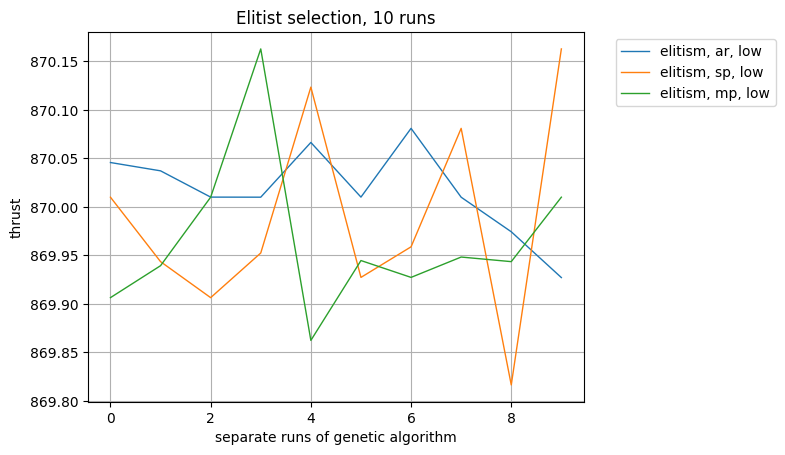

In [54]:
# plot elitism
correct_line = [870 for i in range(100)]
for i, t in enumerate(elitism_tests):
    plt.plot(t['thrust'], label=t['name'], linewidth=1)
    # plt.plot(t['thrust'])
plt.grid()
plt.title('Elitist selection, 10 runs')
plt.ylabel('thrust')
plt.xlabel('separate runs of genetic algorithm')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig('elitism.png')
plt.show()
plt.close()

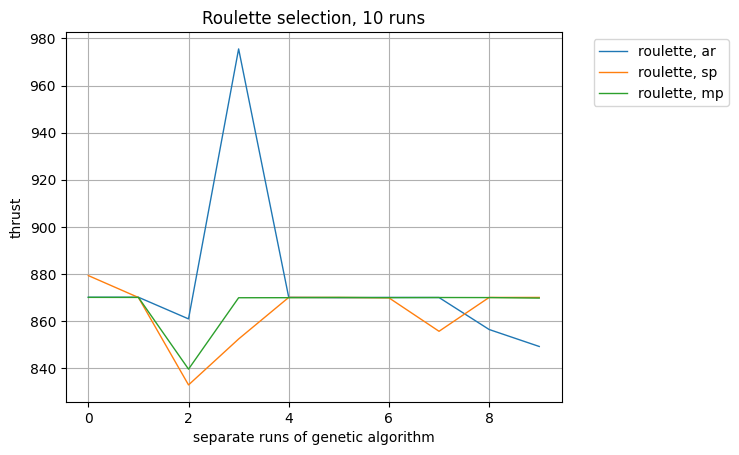

In [70]:
# plot roulette
correct_line = [870 for i in range(10)]
for i, t in enumerate(roulette_tests):
    plt.plot(t['thrust'], label=t['name'], linewidth=1)
plt.title('Roulette selection, 10 runs')
plt.grid()
plt.ylabel('thrust')
plt.xlabel('separate runs of genetic algorithm')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig('roulette.png')
plt.show()



testing.............

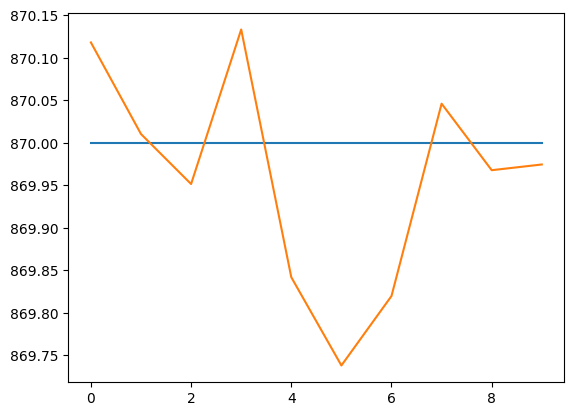

In [18]:
line = [870 for i in range(10)]
quick_test = run_tests('', 10, pop_size=1000, mutate_threshold=0.03, generations=100, selection_scheme=ROULETTE,
                       crossover_type=MULTI_POINT, n_elites=90, thrust_value=870, low_level_mutation=True)
plt.plot(line)
plt.plot(quick_test['thrust'])
plt.show()